In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df= pd.read_csv("Heart_Disease_Prediction.csv")

In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


# Exploratory Data Analysis

In [4]:
print(f"In this dataset there are {df.shape[0]} rows and {df.shape[1]} columns")

In this dataset there are 270 rows and 14 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

# Finding out the highly correlated values of features in our dataset with the Label

In [6]:
df2 = df.copy()

In [7]:
df2.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [8]:
df2["Heart Disease"] = df2["Heart Disease"].map({'Absence': 0  , 'Presence' :1})

In [9]:
df2.corr()["Heart Disease"].sort_values()[:-1]

Max HR                    -0.418514
FBS over 120              -0.016319
Cholesterol                0.118021
BP                         0.155383
EKG results                0.182091
Age                        0.212322
Sex                        0.297721
Slope of ST                0.337616
Chest pain type            0.417436
ST depression              0.417967
Exercise angina            0.419303
Number of vessels fluro    0.455336
Thallium                   0.525020
Name: Heart Disease, dtype: float64

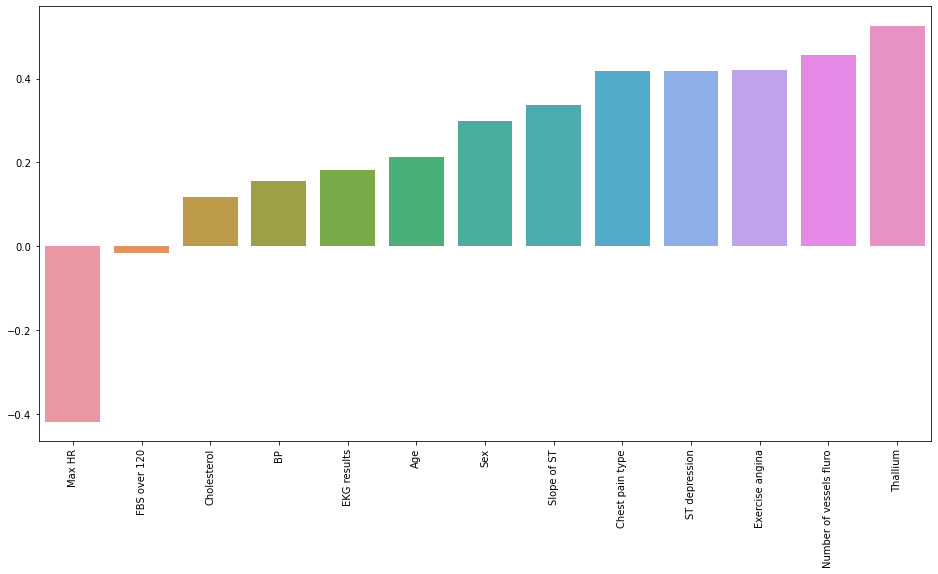

In [10]:
plt.figure(figsize = (16,8))

sns.barplot(x=df2.corr()["Heart Disease"].sort_values()[:-1].index,y=df2.corr()["Heart Disease"].sort_values()[:-1].values)
plt.xticks(rotation=90);

##### "Thalium" & "Number of vessels fluro" features are positively correlated and "Max HR" feature is negatively correlated with our label "Heart Disease" 

### Finding the distribution of data in our dataset

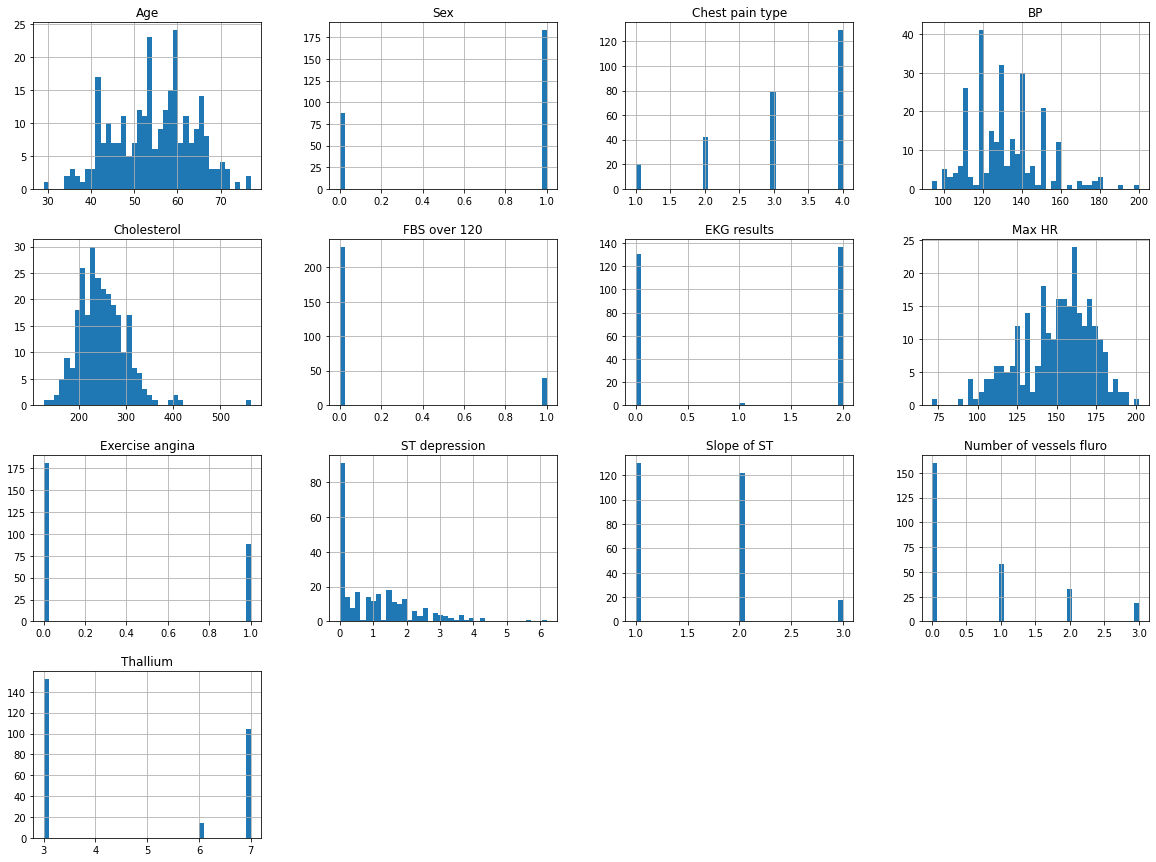

In [11]:
df.hist(bins =40,figsize = (20,15));

# Lets check if we have an imbalanced dataset

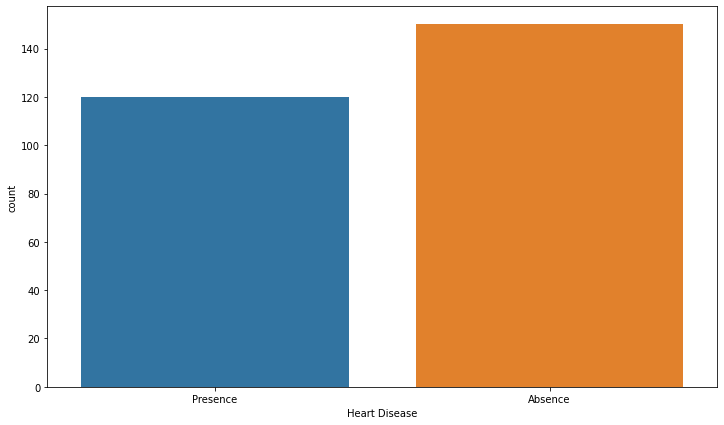

In [12]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x="Heart Disease");

##### Dataset looks to be balanced

# Visualizing Categorical features and Numerical features

#### Categorical features

In [13]:
df_categorical =df.drop(["Age","BP",'Cholesterol','Max HR'],axis = 1)

In [14]:
df_categorical.head()

,Sex,Chest pain type,FBS over 120,EKG results,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,1,4,0,2,0,2.4,2,3,3,Presence
1,0,3,0,2,0,1.6,2,0,7,Absence
2,1,2,0,0,0,0.3,1,0,7,Presence
3,1,4,0,0,1,0.2,2,1,7,Absence
4,0,2,0,2,1,0.2,1,1,3,Absence


## Among Males and females who are more likely to get a heart disease?

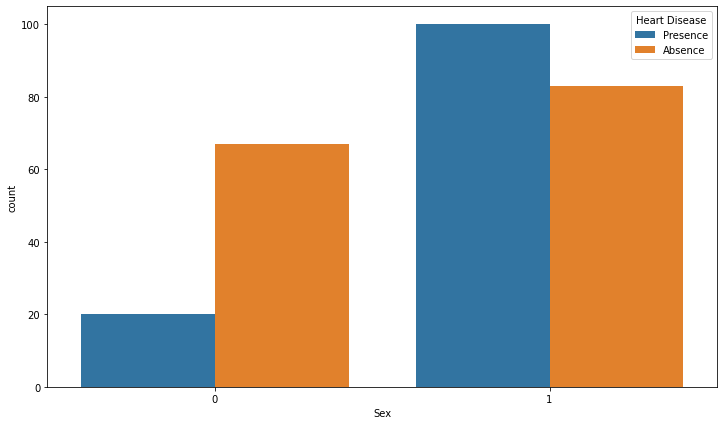

In [15]:
plt.figure(figsize=(12,7))
sns.countplot(data = df_categorical,x= "Sex",hue= "Heart Disease");


##### Males are more prone to Heart disease

# Which Chest Pain Category is more likely a heart disease patient?

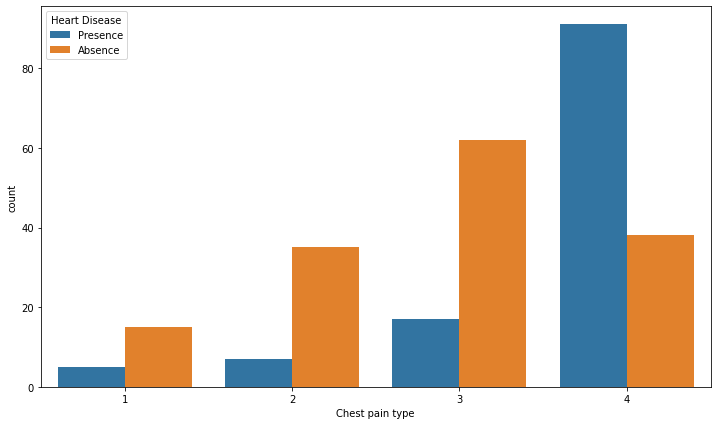

In [16]:
plt.figure(figsize=(12,7))
sns.countplot(data = df_categorical,x= "Chest pain type",hue= "Heart Disease");

##### Chest Pain Category number 4 is more likely a heat disease patient

# Lets Check "FBS over 120" category

In [17]:
df_categorical["FBS over 120"].value_counts()

0    230
1     40
Name: FBS over 120, dtype: int64

In [18]:
df_categorical[df_categorical["FBS over 120"] ==1]["Heart Disease"].value_counts()

Absence     23
Presence    17
Name: Heart Disease, dtype: int64

In [19]:
df_categorical[df_categorical["FBS over 120"] ==0]["Heart Disease"].value_counts()

Absence     127
Presence    103
Name: Heart Disease, dtype: int64

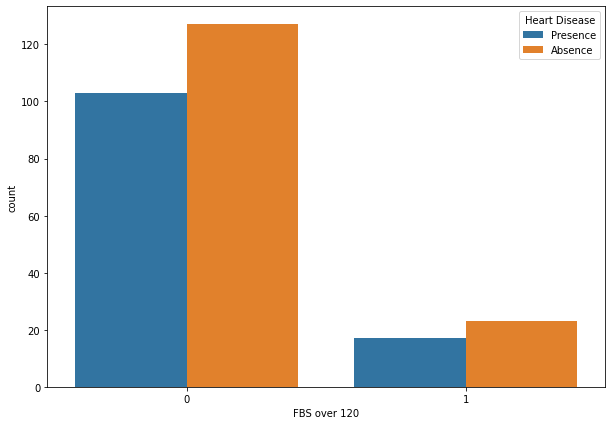

In [20]:
plt.figure(figsize=(10,7))
sns.countplot(data = df_categorical,x= "FBS over 120",hue= "Heart Disease");

#### Fasting blood suguar should be in normal state

# Is higher thalium causing heart disease?

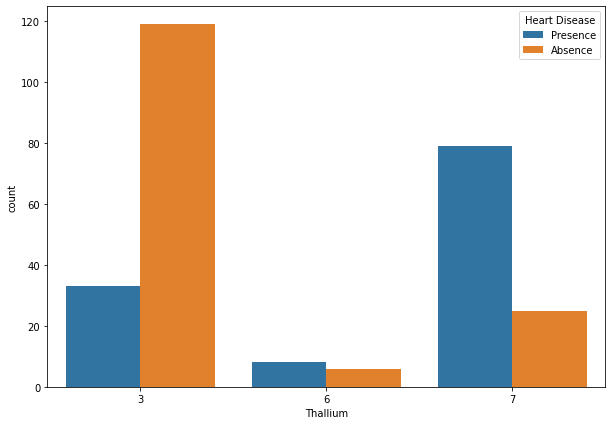

In [21]:
plt.figure(figsize=(10,7))
sns.countplot(data = df_categorical,x= "Thallium",hue= "Heart Disease");

##### Higher thalium is causing more heart disease

#### Numerical features

In [22]:
df_numerical =df.drop(['Sex', 'Chest pain type','FBS over 120',
       'EKG results','Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium'],axis = 1)

In [23]:
df_numerical.head()

,Age,BP,Cholesterol,Max HR,Heart Disease
0,70,130,322,109,Presence
1,67,115,564,160,Absence
2,57,124,261,141,Presence
3,64,128,263,105,Absence
4,74,120,269,121,Absence


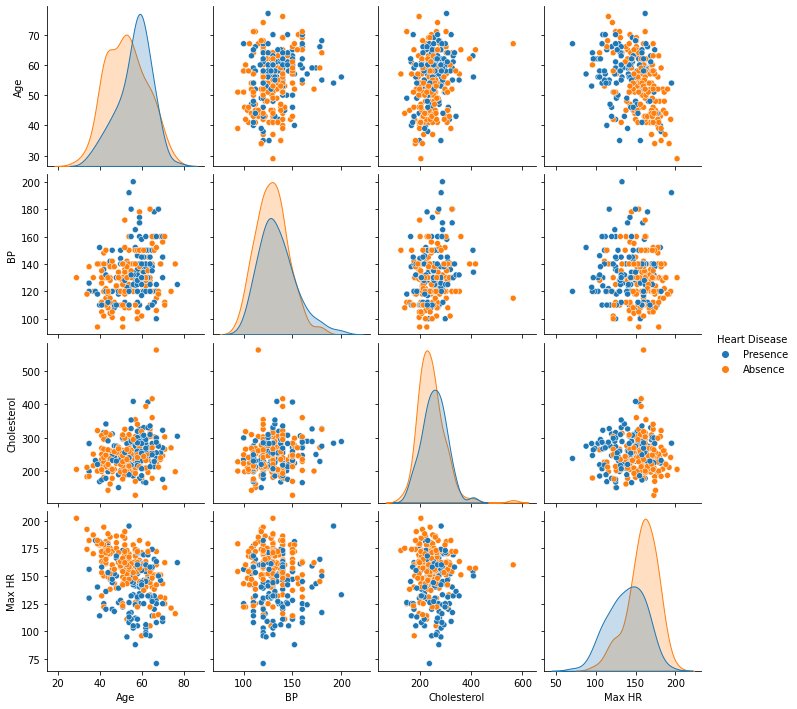

In [24]:
sns.pairplot(data =df_numerical,hue = "Heart Disease")

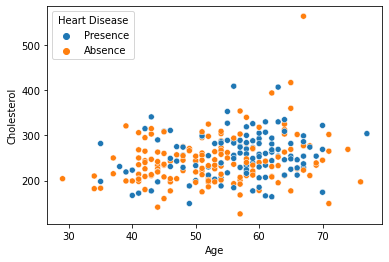

In [25]:
sns.scatterplot(data=df_numerical,x="Age",y="Cholesterol",hue = "Heart Disease");

In [26]:
#Outlier Identified

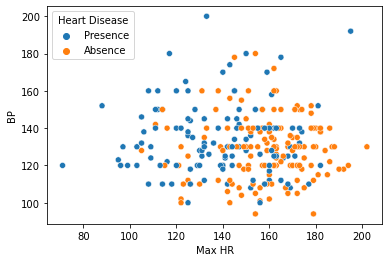

In [27]:
sns.scatterplot(data=df_numerical,x="Max HR",y="BP",hue = "Heart Disease");

In [28]:
#Outlier Identified Maybe

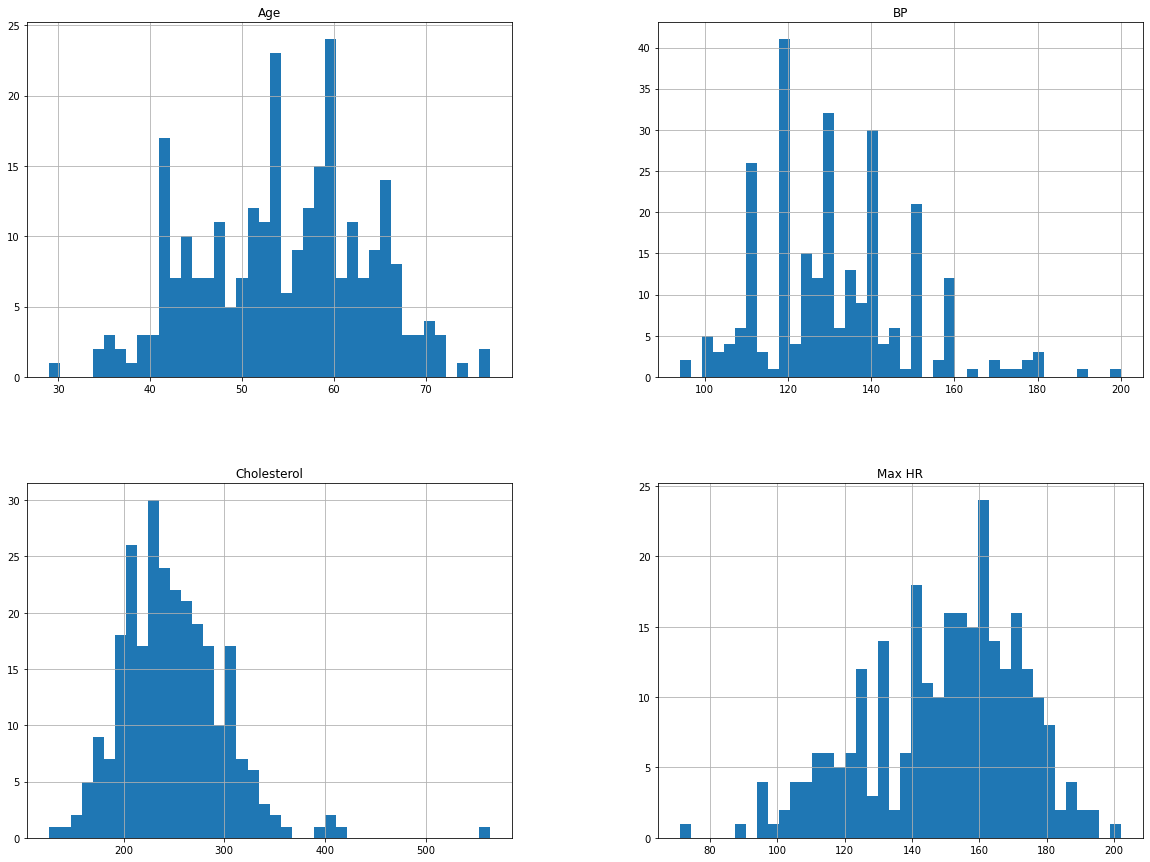

In [29]:
df_numerical.hist(bins =40,figsize = (20,15));

In [30]:
df2=df.copy()
df2.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


# Feature Scaling

In [31]:
df = pd.get_dummies(data = df,columns=["Heart Disease"],drop_first=True)


In [32]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease_Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [33]:
df.rename(columns = {'Heart Disease_Presence':'Heart Disease'}, inplace = True)

In [34]:
df["Heart Disease"].dtype

dtype('uint8')

In [35]:
X = df.drop("Heart Disease",axis =1)

In [36]:
y = df["Heart Disease"]

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model_1: Decision Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt_model = DecisionTreeClassifier()

In [41]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
y_pred = dt_model.predict(X_test)

In [43]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.64      0.71        33
           1       0.57      0.76      0.65        21

    accuracy                           0.69        54
   macro avg       0.69      0.70      0.68        54
weighted avg       0.72      0.69      0.69        54



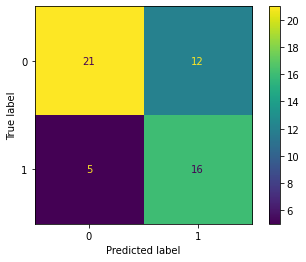

In [45]:
plot_confusion_matrix(dt_model,X_test,y_test);

# Model_2:Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf_model = RandomForestClassifier()

In [48]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
y_pred = rf_model.predict(X_test)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        33
           1       0.94      0.71      0.81        21

    accuracy                           0.87        54
   macro avg       0.89      0.84      0.86        54
weighted avg       0.88      0.87      0.87        54



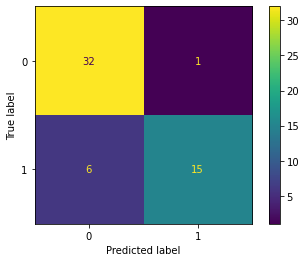

In [51]:
plot_confusion_matrix(rf_model,X_test,y_test);